<a href="https://colab.research.google.com/github/Ansebi/TFT_with_DARTS/blob/main/TFT_with_DARTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install darts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 451 kB 7.8 MB/s 
     |████████████████████████████████| 569 kB 62.0 MB/s 
     |████████████████████████████████| 9.9 MB 65.4 MB/s 
     |████████████████████████████████| 76.6 MB 1.6 MB/s 
     |████████████████████████████████| 798 kB 67.9 MB/s 
     |████████████████████████████████| 11.2 MB 58.1 MB/s 
     |████████████████████████████████| 43 kB 148 kB/s 
     |████████████████████████████████| 1.8 MB 71.6 MB/s 
     |████████████████████████████████| 86 kB 6.2 MB/s 
     |████████████████████████████████| 1.6 MB 49.5 MB/s 
     |████████████████████████████████| 965 kB 69.2 MB/s 
     |████████████████████████████████| 529 kB 74.3 MB/s 
     |████████████████████████████████| 87 kB 7.1 MB/s 
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115940 sha256=27c87015e930ca51e326e709c7015925cd6b45a71734c35f18ebeb4e0e398200
  

In [ ]:
# ## Importing Libraries
# import sys
# import time
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from datetime import datetime
# from functools import reduce

# from darts import TimeSeries
# from darts.models import (
#     NaiveSeasonal,
#     NaiveDrift,
#     Prophet,
#     ExponentialSmoothing,
#     ARIMA,
#     AutoARIMA,
#     RegressionEnsembleModel,
#     RegressionModel,
#     Theta,
#     FFT
# )

# from darts.metrics import mape, mase
# from darts.utils.statistics import check_seasonality, plot_acf, plot_residuals_analysis
# from darts.datasets import AirPassengersDataset

# import warnings
# warnings.filterwarnings("ignore")
# import logging
# logging.disable(logging.CRITICAL)

# ## Load the pre-loaded Dataset
# series = AirPassengersDataset().load()
# series.plot()

# ## Split train and test data
# train, val = series.split_before(pd.Timestamp('19570101'))
# train.plot(label='training')
# val.plot(label='validation')
# plt.legend();

# ## Fitting multiple models and checking the MAPE
# def eval_model(model):
#     model.fit(train)
#     forecast = model.predict(len(val))
#     print('model {} obtains MAPE: {:.2f}%'.format(model, mape(val, forecast)))

# eval_model(ExponentialSmoothing())
# eval_model(Prophet())
# eval_model(AutoARIMA())
# eval_model(Theta())

# ## Visualizing theta foreacsting result
# train.plot(label='train')
# val.plot(label='true')
# forecast.plot(label='prediction')
# plt.legend();

# ## Tuning the theta parameter to see if MAPE reduces
# ## Search for the best theta parameter, by trying 50 different values
# thetas = 2 - np.linspace(-10, 10, 50)

# best_mape = float('inf')
# best_theta = 0

# for theta in thetas:
#     model = Theta(theta)
#     model.fit(train)
#     pred_theta = model.predict(len(val))
#     res = mape(val, pred_theta)

#     if res < best_mape:
#         best_mape = res
#         best_theta = theta
        
# ## Fitting and predicting again usinh best theta value
# best_theta_model = Theta(best_theta)
# best_theta_model.fit(train)
# pred_best_theta = best_theta_model.predict(len(val))

# print('The MAPE is: {:.2f}, with theta = {}.'.format(mape(val, pred_best_theta), best_theta))

# ## Visualize 
# train.plot(label='train')
# val.plot(label='true')
# pred_best_theta.plot(label='prediction')
# plt.legend();

In [ ]:
import sys
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from functools import reduce

from darts import TimeSeries
from darts.models import (
    TFTModel,
    NaiveSeasonal,
    NaiveDrift,
    Prophet,
    ExponentialSmoothing,
    ARIMA,
    AutoARIMA,
    RegressionEnsembleModel,
    RegressionModel,
    Theta,
    FFT
)

from darts.metrics import mape, mase
from darts.utils.statistics import check_seasonality, plot_acf, plot_residuals_analysis
from darts.datasets import AirPassengersDataset

import warnings
warnings.filterwarnings("ignore")
import logging
logging.disable(logging.CRITICAL)

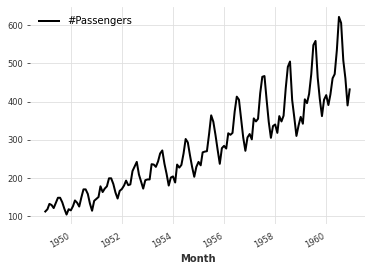

In [ ]:
# Load the pre-loaded Dataset
series = AirPassengersDataset().load()
series.plot()

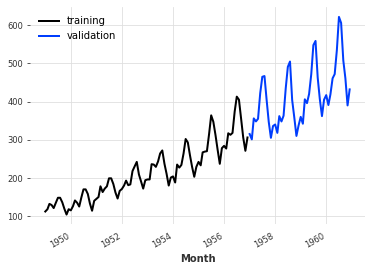

In [ ]:
# Split train and test data
train, val = series.split_before(pd.Timestamp('19570101'))
train.plot(label='training')
val.plot(label='validation')
plt.legend()
plt.show()

In [ ]:
input_chunk_length = 24
forecast_horizon = 12

In [ ]:
from torch.nn import MSELoss

model ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=12 obtains MAPE: 5.03%


Training: 0it [00:00, ?it/s]

Predicting: 4it [00:00, ?it/s]

model <darts.models.forecasting.tft_model.TFTModel object at 0x7fa42b242050> obtains MAPE: 98.34%


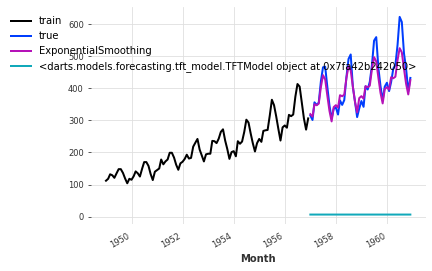

In [ ]:
# Fitting multiple models and checking the MAPE
def eval_model(model):
    model.fit(train)
    forecast = model.predict(len(val))
    print('model {} obtains MAPE: {:.2f}%'.format(model, mape(val, forecast)))
    ## Visualizing theta foreacsting result
    forecast.plot(label=str(model).split('(')[0])
    plt.legend()

train.plot(label='train')
val.plot(label='true')
# models = [
#     TFTModel(),
#     ARIMA(),
#     AutoARIMA(),
#     RegressionEnsembleModel(),
#     RegressionModel(),
#     Theta(),
#     FFT()
#     ]
# for model in models:
#     eval_model(model)

models = [
    es_model,
    tft_model
    ]
for model in models:
    eval_model(model)

In [ ]:
## Tuning the theta parameter to see if MAPE reduces
## Search for the best theta parameter, by trying 50 different values
thetas = 2 - np.linspace(-10, 10, 50)

best_mape = float('inf')
best_theta = 0

for theta in thetas:
    model = Theta(theta)
    model.fit(train)
    pred_theta = model.predict(len(val))
    res = mape(val, pred_theta)

    if res < best_mape:
        best_mape = res
        best_theta = theta
        
## Fitting and predicting again usinh best theta value
best_theta_model = Theta(best_theta)
best_theta_model.fit(train)
pred_best_theta = best_theta_model.predict(len(val))

print('The MAPE is: {:.2f}, with theta = {}.'.format(mape(val, pred_best_theta), best_theta))

The MAPE is: 4.45, with theta = -3.1020408163265305.


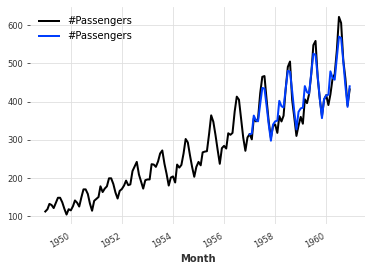

In [ ]:
series.plot()
pred_best_theta.plot()

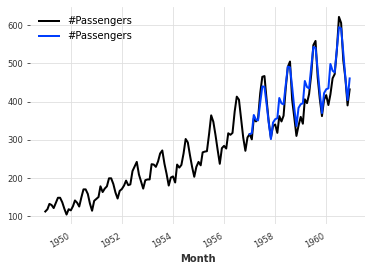

In [ ]:
series.plot()
Theta(-19/10).fit(train).predict(len(val)).plot()

In [ ]:
1/0

In [ ]:
pip install darts

In [ ]:
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook as tqdm

import matplotlib.pyplot as plt

from darts import TimeSeries, concatenate
from darts.dataprocessing.transformers import Scaler
from darts.models import TFTModel
from darts.metrics import mape
from darts.utils.statistics import check_seasonality, plot_acf
from darts.datasets import AirPassengersDataset, IceCreamHeaterDataset
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.utils.likelihood_models import QuantileRegression
from torch.nn import MSELoss

import warnings

warnings.filterwarnings("ignore")
import logging

logging.disable(logging.CRITICAL)

In [ ]:
# before starting, we define some constants
num_samples = 200
figsize = (20, 6)

In [ ]:
# Read data
series = AirPassengersDataset().load()

# we convert monthly number of passengers to average daily number of passengers per month
series = series / TimeSeries.from_series(series.time_index.days_in_month)
series = series.astype(np.float32)

# Create training and validation sets:
training_cutoff = pd.Timestamp("19571201")
train, val = series.split_after(training_cutoff)

# Normalize the time series (note: we avoid fitting the transformer on the validation set)
transformer = Scaler()
train_transformed = transformer.fit_transform(train)
val_transformed = transformer.transform(val)
series_transformed = transformer.transform(series)

# create year, month and integer index covariate series
covariates = datetime_attribute_timeseries(series, attribute="year", one_hot=False)
covariates = covariates.stack(
    datetime_attribute_timeseries(series, attribute="month", one_hot=False)
)
covariates = covariates.stack(
    TimeSeries.from_times_and_values(
        times=series.time_index,
        values=np.arange(len(series)),
        columns=["linear_increase"],
    )
)
covariates = covariates.astype(np.float32)

# transform covariates (note: we fit the transformer on train split and can then transform the entire covariates series)
scaler_covs = Scaler()
cov_train, cov_val = covariates.split_after(training_cutoff)
scaler_covs.fit(cov_train)
covariates_transformed = scaler_covs.transform(covariates)

In [ ]:
input_chunk_length = 24
forecast_horizon = 12
my_model = TFTModel(
    input_chunk_length=input_chunk_length,
    output_chunk_length=forecast_horizon,
    hidden_size=64,
    lstm_layers=1,
    num_attention_heads=4,
    dropout=0.1,
    batch_size=16,
    n_epochs=300,
    add_relative_index=False,
    add_encoders=None,
    likelihood=None,
    loss_fn=MSELoss(),
    random_state=42,
)
my_model.fit(train_transformed, future_covariates=covariates_transformed, verbose=True)

Training: 0it [00:00, ?it/s]

In [ ]:
def eval_model(model, n, actual_series, val_series):
    pred_series = model.predict(n=n, num_samples=num_samples)

    # plot actual series
    plt.figure(figsize=figsize)
    actual_series[: pred_series.end_time()].plot(label="actual")

    # plot prediction with quantile ranges
    pred_series.plot()

    plt.title(f"MAPE: {mape(val_series, pred_series):.2f}%")
    plt.legend()

Predicting: 5it [00:00, ?it/s]

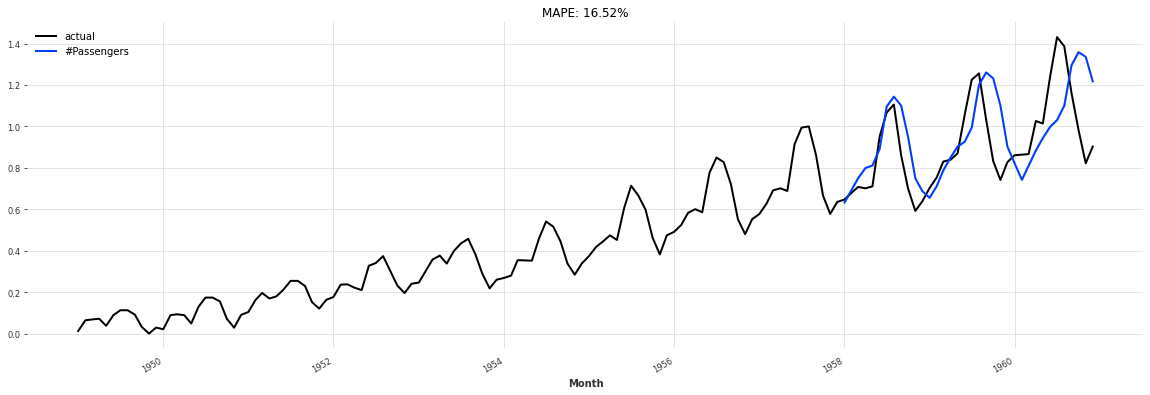

In [ ]:
eval_model(my_model, len(val), series_transformed, val_transformed)

In [ ]:
1/0

In [ ]:
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook as tqdm

import matplotlib.pyplot as plt

from darts import TimeSeries, concatenate
from darts.dataprocessing.transformers import Scaler
from darts.models import TFTModel
from darts.metrics import mape
from darts.utils.statistics import check_seasonality, plot_acf
from torch.nn import MSELoss

import warnings

warnings.filterwarnings("ignore")
import logging

logging.disable(logging.CRITICAL)

In [ ]:
TRAIN_FRACTION = 0.8
LIMIT = 500
EPOCHS = 100

## Generate $sin(x)$-based time series

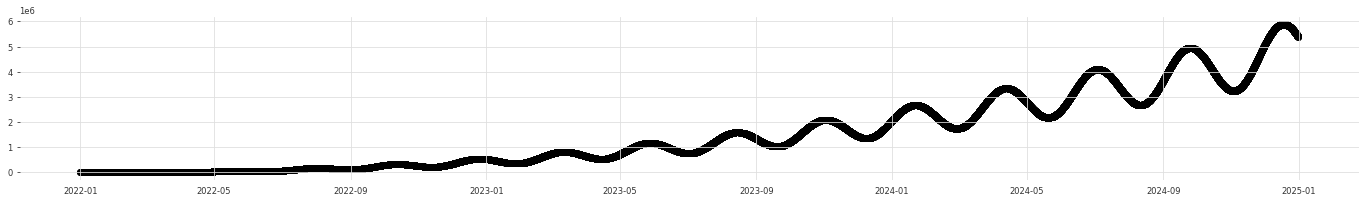

In [ ]:
n_years = 3
alpha = 1/6
beta = 0.9
amplitude = 1
elevation_power = 2.2
amplitude_change_power = 2
period_starts = pd.Timestamp('2022-01-01')

duration_days = 365*n_years
period_ends = period_starts + pd.Timedelta(days=duration_days)

x = np.linspace(1, duration_days, duration_days*24)
y = x**elevation_power
y += amplitude*x**amplitude_change_power*np.sin(x**beta*alpha)
x_date = pd.date_range(period_starts, period_ends, freq='H')[:-1]

plt.figure(figsize=(24,3))
plt.scatter(x=x_date, y=y)
plt.show()

In [ ]:
y, x_date = y[:LIMIT], x_date[:LIMIT]
series = TimeSeries.from_values(y)
covariates = TimeSeries.from_values(np.array(list(zip(x_date.year, x_date.month, x_date.day))))

In [ ]:
train_len = int(len(y)*TRAIN_FRACTION)
train, test = series[:train_len], series[train_len:]

# Normalize the time series (note: we avoid fitting the transformer on the validation set)
transformer = Scaler()
train_transformed = transformer.fit_transform(train)
test_transformed = transformer.transform(test)
series_transformed = transformer.transform(series)

# # transform covariates (note: we fit the transformer on train split and can then transform the entire covariates series)
scaler_covs = Scaler()
cov_train, cov_test = covariates[:train_len], covariates[train_len:]
scaler_covs.fit(cov_train)
covariates_transformed = scaler_covs.transform(covariates)

In [ ]:
input_chunk_length = len(y) - train_len
forecast_horizon = input_chunk_length
my_model = TFTModel(
    input_chunk_length=input_chunk_length,
    output_chunk_length=forecast_horizon,
    hidden_size=8,
    lstm_layers=1,
    num_attention_heads=4,
    dropout=0.1,
    batch_size=input_chunk_length,
    n_epochs=EPOCHS,
    add_relative_index=False,
    add_encoders=None,
    likelihood=None,
    loss_fn=MSELoss(),
    random_state=42,
)
my_model.fit(train_transformed, future_covariates=covariates_transformed, verbose=True)

Training: 0it [00:00, ?it/s]

In [ ]:
def eval_model(model, n, actual_series, val_series):
    pred_series = model.predict(n=n, num_samples=num_samples)

    # plot actual series
    plt.figure(figsize=figsize)
    actual_series[: pred_series.end_time()].plot(label="actual")

    # plot prediction with quantile ranges
    pred_series.plot()

    plt.title(f"MAPE: {mape(val_series, pred_series):.2f}%")
    plt.legend()

In [ ]:
num_samples = int(len(test) * TRAIN_FRACTION)
figsize = (20, 6)

Predicting: 3it [00:00, ?it/s]

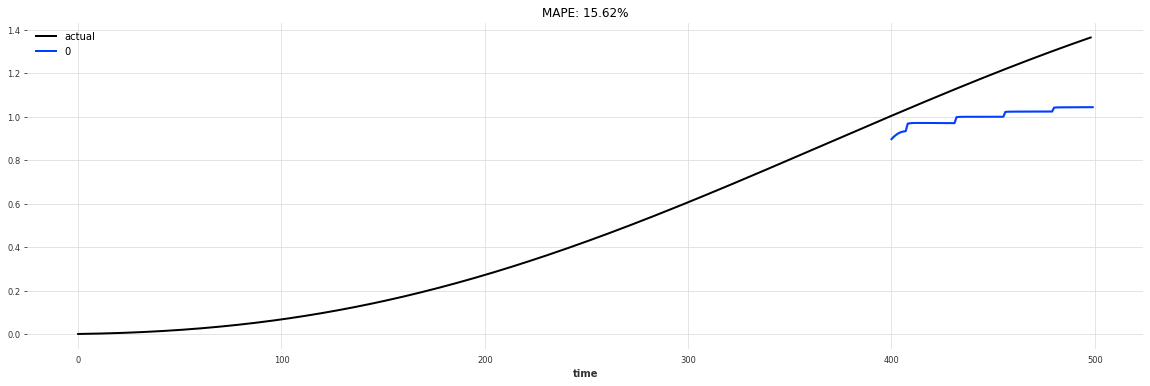

In [ ]:
eval_model(my_model, len(test), series_transformed, test_transformed)

#Conclusion
This approach (using TFT with DARTS) lacks a comprehensive approach to work with large data sequences. There must be away to force the things to work,
but I shall check the PyTorch TFT implementation first...<br>
PS I have enjoyed Theta model which was provided as one of the examples that I based on. DARTS-Theta combination is probably worth further testing.